In [4]:
import numpy as np
import pylab as pl # SE TARDA
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
# graficar
def Graf(X, Y, Z, xy = None, xyz = None, xlabel=None , ylabel=None, zlabel=None, fig=None):

    #plt.rcParams['figure.figsize'] = [20, 12]
    if fig is None:
        fig = pl.figure()
    #ax = Axes3D(fig)
    surf = fig.plot_surface(X, Y, Z,  cmap='bone')
    if xlabel is not None :
        fig.set_xlabel(xlabel)
    if ylabel is not None:
        fig.set_ylabel(ylabel)
    if zlabel is not None:
        fig.set_zlabel(zlabel)

    #fig = plt.figure()
    #ax = fig.gca(projection='3d')
    #surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.colors.coolwarm, linewidth=0, antialiased=False)
    #fig.set_zlim(0, np.max(Z))

    #fig.zaxis.set_major_locator(LinearLocator(10))
    #fig.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if xy and xyz is not None:
        fig.view_init(xy, xyz)
        #print("rota")

    #c
    #fig.show()
    #print(surf)
    return surf

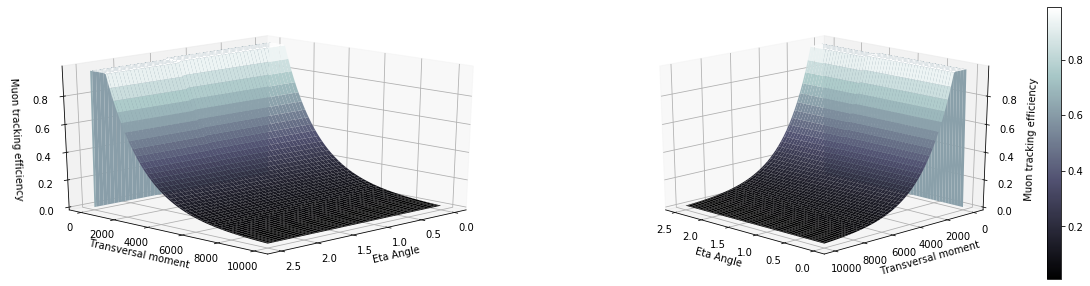

In [7]:
##########################
# Muon tracking efficiency
##########################
#fig = pl.figure(1)
pl.rcParams['figure.figsize'] = [20, 5]
fig = pl.figure()

pt_v = np.linspace(0, 10000,100)
eta_v = np.linspace(0, 2.5, 100)
pt_mesh, eta_mesh = np.meshgrid(pt_v, eta_v)
Mu_track = (pt_mesh <= 0.1) * 0.00 + \
           (abs(eta_mesh) <= 1.5) * (pt_mesh > 0.1) * (pt_mesh <= 1.0) * 0.75 + \
           (abs(eta_mesh) <= 1.5) * (pt_mesh > 1.0) * (pt_mesh <= 1.0e3) * 0.99 + \
           (abs(eta_mesh) <= 1.5) * (pt_mesh > 1.0e3) * (0.99*np.exp(0.5 - pt_mesh*5.0e-4)) + \
           (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 0.1) * (pt_mesh <= 1.0) * 0.70 + \
           (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 1.0) * (pt_mesh <= 1.0e3) * 0.98 + \
           (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 1.0e3) * (0.98*np.exp(0.5 - pt_mesh*5.0e-4)) + \
           (abs(eta_mesh) > 2.5) * 0.00
#print(Mu_track)
# pl.figure()
ax = fig.add_subplot(121, projection='3d')
g1 = Graf(eta_mesh, pt_mesh, Mu_track, xy=20, xyz=45,
     xlabel= "Eta Angle", ylabel="Transversal moment", zlabel="Muon tracking efficiency", fig=ax)

ax = fig.add_subplot(122, projection='3d')
g2 = Graf(eta_mesh, pt_mesh, Mu_track, xy=20, xyz=135,
     xlabel= "Eta Angle", ylabel="Transversal moment", zlabel="Muon tracking efficiency", fig=ax)
fig.colorbar(g2)
#ax.show()
pl.savefig("Muon tracking efficiency 3D.png")
pl.savefig("Muon tracking efficiency 3D.pdf")

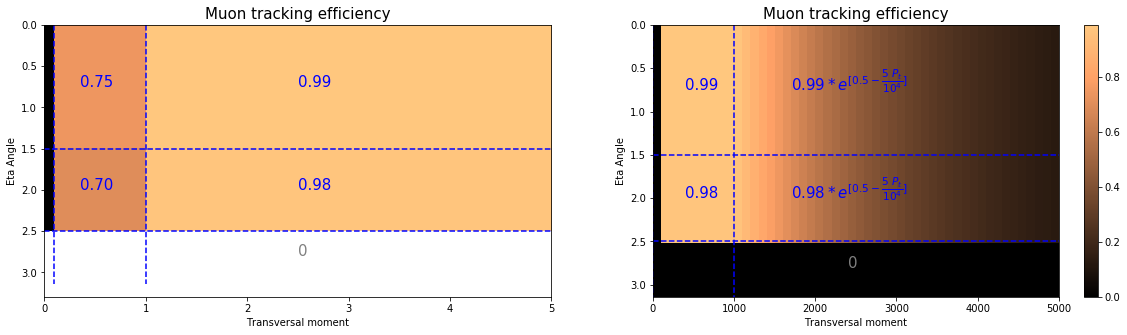

In [6]:
# DIAGRAMA 1
pl.rcParams['figure.figsize'] = [20, 5]
fig = pl.figure()

pt_v = np.linspace(0, 5, 100)
eta_v = np.linspace(0, 2.5, 100)
pt_mesh, eta_mesh = np.meshgrid(pt_v, eta_v)
Mu_track = (pt_mesh <= 0.1) * 0.00 + \
           (abs(eta_mesh) <= 1.5) * (pt_mesh > 0.1) * (pt_mesh <= 1.0) * 0.75 + \
           (abs(eta_mesh) <= 1.5) * (pt_mesh > 1.0) * (pt_mesh <= 1.0e3) * 0.99 + \
           (abs(eta_mesh) <= 1.5) * (pt_mesh > 1.0e3) * (0.99*np.exp(0.5 - pt_mesh*5.0e-4)) + \
           (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 0.1) * (pt_mesh <= 1.0) * 0.70 + \
           (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 1.0) * (pt_mesh <= 1.0e3) * 0.98 + \
           (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 1.0e3) * (0.98*np.exp(0.5 - pt_mesh*5.0e-4)) + \
           (abs(eta_mesh) > 2.5) * 0.00

ax = fig.add_subplot(121)
g1=ax.imshow(Mu_track,
             cmap='copper',
             extent=[np.min(pt_v), np.max(pt_v), np.max(eta_v), np.min(eta_v)],
             aspect='auto')
ax.plot([1, 1], [0, 3.14], "--", color="blue")
ax.plot([.1, .1], [0, 3.14], "--", color="blue")
ax.plot([0, 5], [2.5, 2.5], "--", color="blue")
ax.plot([0, 5], [1.5, 1.5], "--", color="blue")
pl.ylabel('Eta Angle')
pl.xlabel("Transversal moment")
pl.title("Muon tracking efficiency", fontsize=15)
#pl.colorbar(shrink=0.95)
pl.text(.35, .75, '0.75', color="blue", fontsize=15)
pl.text(2.5, .75, '0.99', color="blue", fontsize=15)
pl.text(.35, 2, '0.70', color="blue", fontsize=15)
pl.text(2.5, 2, '0.98', color="blue", fontsize=15)
pl.text(2.5, 2.8, '0', color="gray", fontsize=15)
#pl.show()

# DIAGRAMA 2
pt_v = np.linspace(0, 5000, 50)
eta_v = np.linspace(0, 3.14, 50)
pt_mesh, eta_mesh = np.meshgrid(pt_v, eta_v)
Mu_track = (pt_mesh <= 0.1) * 0.00 + \
           (abs(eta_mesh) <= 1.5) * (pt_mesh > 0.1) * (pt_mesh <= 1.0) * 0.75 + \
           (abs(eta_mesh) <= 1.5) * (pt_mesh > 1.0) * (pt_mesh <= 1.0e3) * 0.99 + \
           (abs(eta_mesh) <= 1.5) * (pt_mesh > 1.0e3) * (0.99*np.exp(0.5 - pt_mesh*5.0e-4)) + \
           (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 0.1) * (pt_mesh <= 1.0) * 0.70 + \
           (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 1.0) * (pt_mesh <= 1.0e3) * 0.98 + \
           (abs(eta_mesh) > 1.5) * (abs(eta_mesh) <= 2.5) * (pt_mesh > 1.0e3) * (0.98*np.exp(0.5 - pt_mesh*5.0e-4)) + \
           (abs(eta_mesh) > 2.5) * 0.00

ax = fig.add_subplot(122)
g2=ax.imshow(Mu_track,
             cmap='copper',
             extent=[np.min(pt_v), np.max(pt_v), np.max(eta_v), np.min(eta_v)],
             aspect='auto')
ax.plot([1000, 1000], [0, 3.14], "--", color="blue")
ax.plot([1, 1], [0, 3.14], "--", color="blue")
ax.plot([.1, .1], [0, 3.14], "--", color="blue")
ax.plot([0, 5000], [2.5, 2.5], "--", color="blue")
ax.plot([0, 5000], [1.5, 1.5], "--", color="blue")
pl.ylabel('Eta Angle')
pl.xlabel("Transversal moment")
pl.title("Muon tracking efficiency", fontsize=15)
fig.colorbar(g2)
pl.text(400, .75, '0.99', color="blue", fontsize=15)
pl.text(400, 2, '0.98', color="blue", fontsize=15)
pl.text(1700, .75, r'$0.99*e^{[0.5 - \dfrac{5~P_t}{10^4}]}$', color="blue", fontsize=15)
pl.text(1700, 2, r'$0.98*e^{[0.5 - \dfrac{5~P_t}{10^4}]}$', color="blue", fontsize=15)
pl.text(2400, 2.8, '0', color="gray", fontsize=15)
#pl.show()
pl.savefig("Muon tracking efficiency 2D.png")
pl.savefig("Muon tracking efficiency 2D.pdf")

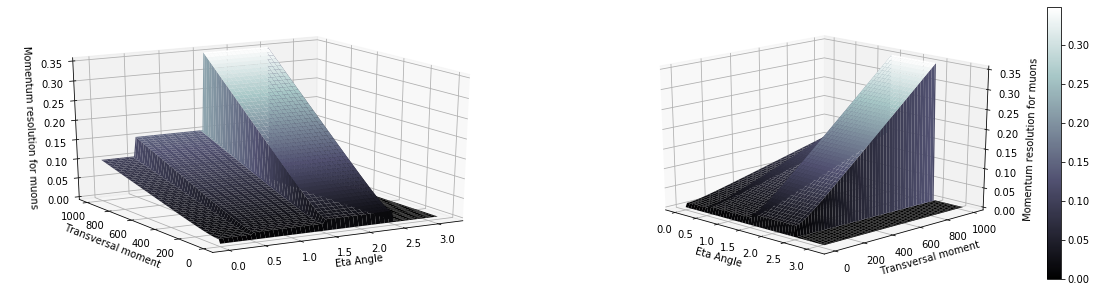

In [45]:
###############################
# Momentum resolution for muons
###############################
pl.rcParams['figure.figsize'] = [20, 5]
fig = pl.figure()

pt_v = np.linspace(0.1, 1000,100)
eta_v = np.linspace(0, 3.14,100)
pt_mesh, eta_mesh = np.meshgrid(pt_v, eta_v)
Mu_resl = (abs(eta_mesh) <= 0.5)*(pt_mesh > 0.1)*np.sqrt(0.01**2 + pt_mesh**2*1.0e-4**2) + \
          (abs(eta_mesh) > 0.5)*(abs(eta_mesh) <= 1.5)*(pt_mesh > 0.1)*np.sqrt(0.015**2 + pt_mesh**2*1.5e-4**2) + \
          (abs(eta_mesh) > 1.5)*(abs(eta_mesh) <= 2.5)*(pt_mesh > 0.1)*np.sqrt(0.025**2 + pt_mesh**2*3.5e-4**2)

#print(Mu_resl)
ax = fig.add_subplot(121, projection='3d')
g1 = Graf(eta_mesh, pt_mesh, Mu_resl, xy=20, xyz=-120,
     xlabel= "Eta Angle", ylabel="Transversal moment", zlabel="Momentum resolution for muons", fig=ax)



ax = fig.add_subplot(122, projection='3d')
g2 = Graf(eta_mesh, pt_mesh, Mu_resl, xy=20, xyz=-45,
     xlabel= "Eta Angle", ylabel="Transversal moment", zlabel="Momentum resolution for muons", fig=ax)
fig.colorbar(g2)
#ax.show()
pl.savefig("Momentum resolution for muons 3D.png")
pl.savefig("Momentum resolution for muons 3D.pdf")


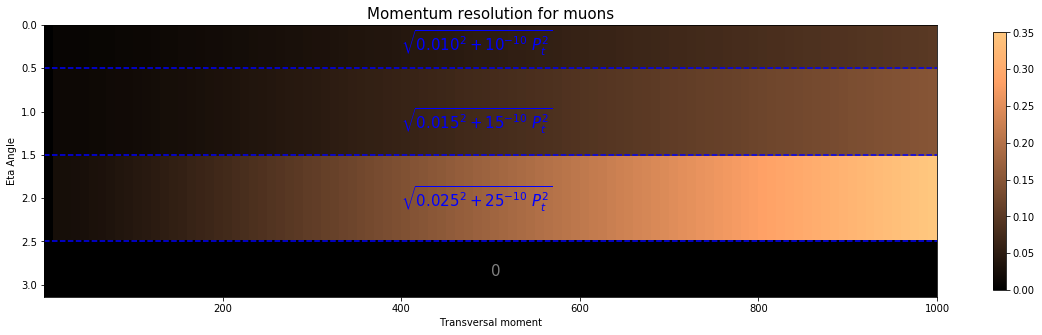

In [54]:
# DIAGRAMA 1
pl.rcParams['figure.figsize'] = [20, 5]
fig = pl.figure()

#pl.contourf(eta_mesh,pt_mesh,Mu_resl,100, alpha=.75, cmap='pink')
ax=pl.imshow(Mu_resl,
             cmap='copper',
             extent=[np.min(pt_v), np.max(pt_v), np.max(eta_v), np.min(eta_v)],
             aspect='auto')
pl.plot([0.1, 1000], [2.5, 2.5], "--", color="blue")
pl.plot([0.1, 1000], [1.5, 1.5], "--", color="blue")
pl.plot([0.1, 1000], [.5, .5], "--", color="blue")
pl.ylabel('Eta Angle')
pl.xlabel("Transversal moment")
pl.title("Momentum resolution for muons", fontsize=15)
pl.colorbar(shrink=0.95)
pl.text(400, .3, r'$\sqrt{0.010^2 +10^{-10} ~ P_t^2}$', color="blue", fontsize=15)
pl.text(400, 1.2, r'$\sqrt{0.015^2 + 15^{-10} ~ P_t^2}$', color="blue", fontsize=15)
pl.text(400, 2.1, r'$\sqrt{0.025^2 + 25^{-10} ~ P_t^2}$', color="blue", fontsize=15)
pl.text(500, 2.9, '0', color="gray", fontsize=15)

pl.savefig("Momentum resolution for muons 2D.png")
pl.savefig("Momentum resolution for muons 2D.pdf")
